# Homework 1 - Linear Regression
In this homework<br/>
-you will be implementing simple linear regression and multiple linear regression<br/>
-you will compute R2 and Adjusted R2 scores<br/>
You will use linear regression for predicting an outcome as well as determining relevant predictors.<br/>

## Scenario

Assume you are working as a consultant/analyst at a firm, you are given a dataset containing profit and expenditure information of startups. Your job is to perform simple linear regression and multiple linear regression to predict the profit of the startup and find out the most relevant predictor or combination of predictors in predicting the profit.<br/> 

## Dataset
The dataset you will be using is the "Startup Dataset". Use the following link to download the csv file of the dataset:<br/>
https://www.kaggle.com/harsh45/startups-dataset<br/>
The dataset has 50 rows and 5 columns. <br/>
The data represents the profit made by startups in 3 US states. Each row stands for a startup and has information on the expenditure of the startup (R&D spend, Administration, Marketing Spend) and state of the startup.



In [1]:
import csv
import numpy as np
import pandas as pd

%matplotlib notebook

Download the dataset from the link provided and change the path of the dataset accordingly below.

In [2]:
dataset_path = "50_Startups.csv" # insert the path of the csv
df = pd.read_csv(dataset_path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Exploration
We can plot a histogram of the dataframe to understand the distributions of the continuous values.<br/>


<IPython.core.display.Javascript object>


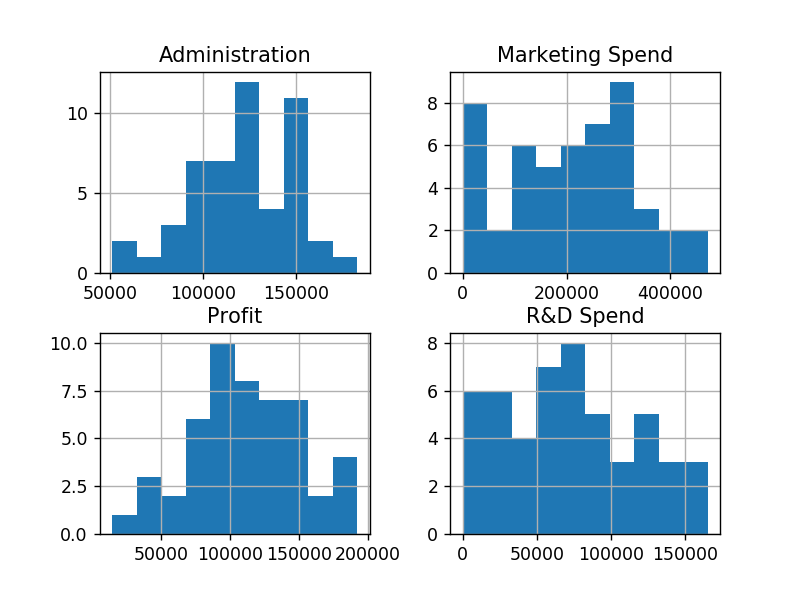

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EC8FC7A48>,
      dtype=object)

In [5]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###

df.hist()

Q1. What can you infer from the histograms? <br/>
Ans- 

Compute the correlation matrix to get an understanding of the correlation between profit and different kinds of expenditure.<br/>



In [6]:
### WRITE CODE TO OBTAIN AND DISPLAY CORRELATION MATRIX ###

df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Answer the following questions:<br/>

Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans - 

Q3. Why is the matrix symmetric along diagonal?<br/>
Ans - 

Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with profit as the outcome, which one would you choose and why? <br/>
Ans - 


## Simple Linear Regression

Simple linear regression describes the case where we have a single predictor and a single outcome. We are interested in finding the "line of best fit" for the data. There are two constraints that guide us to the simple linear regression solution:

1. "line": characterized by a slope and intercept
2. "best fit": Minimizes the sum of squares and passes through the mean.

More formally, given some set of points (X, Y), we want to find a line of the form <br/>
$y = \beta_1 x + \beta_0$<br/>

That minimizes <br/>
$\sum(y-\hat{y})^2$<br/>

Through a bit of algebra, we find:<br/>
$\hat{\beta_1} = \dfrac{\sum((x_i-\bar{x})(y_i-\bar{y}))}{\sum(x_i - \bar{x})^2}$<br/>
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$<br/>

Please use base python to implement simple_linear_regression() in regression_utils.py<br/>
Perform simple linear regression on the dataset with profit as the outcome. Use the predictor you chose in Q4.

In [7]:
from regression_utils import simple_linear_regression

In [10]:
### BELOW ENTER THE NAME OF THE COULMN YOU CHOSE AS A PREDICTOR IN Q4
x1 = df["R&D Spend"].values.reshape(-1,1) 
y1 = df["Profit"].values
b1, b0 = simple_linear_regression(x1, y1)

Q5. Print the slope and the intercept obtained

In [11]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = [0.85429137]
Intercept(b0) = [49032.89914125]


### Prediction

Using a model that has R&D Spend as the predictor and Profit as the outcome, make the following predictions.
(If you have already implemented the model with R&D as the predictor in the previous question, you don't need to rewrite it. Use the model to make predcitions.)

In [22]:
### CODE FOR THE MODEL AND PREDICTIONS

print(b0 + b1 * 50000)
print(b0 + b1 * 75000)
print(b0 + b1 * 100000)
print(b0 + b1 * 200000)

[91747.46768819]
[113104.75196166]
[134462.03623513]
[219891.17332901]


Q6. For a company that spends 50k on R&D Spend, what would be the profit?<br/>
Ans- 

Q7. For a company that spends 75k on R&D Spend, what would be the profit?<br/>
Ans- 

Q8. For a company that spends 100k on R&D Spend, what would be the profit?<br/>
Ans- 

Q9. For a company that spends 200k on R&D Spend, what would be the profit?<br/>
Ans- 


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Note down the results after performing Z-score Normalization on R&D feature.


In [12]:
from sklearn.preprocessing import StandardScaler
x1 = df["R&D Spend"].values.reshape(-1,1)
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
y1 = df["Profit"].values
b1, b0 = simple_linear_regression(x1, y1)


Q10. Print the slope and the intercept obtained

In [13]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = [38819.78205266]
Intercept(b0) = [112012.6392]


Q11. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-

Q12. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans-

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the dataset with predictors as R&D Spend, Administration, Marketing Spend, State and outcome as Profit.

R&D Spend, Administration and Marketing Spend are continuous values whereas State contains discrete values. State can only take on the values New York, California or Florida. We need to perform one-hot encoding on State values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code for performing one-hot encoding is provided below. 

Please use numpy to implement multiple_regression() in regression_utils.py and use it below.


In [3]:
from regression_utils import multiple_regression

In [4]:
x2 = df[["R&D Spend","Administration","Marketing Spend"]]
one_hot = pd.get_dummies(df[["State"]])
x2 = pd.concat([x2,one_hot],axis=1)

y2 = df["Profit"].values
bhat = multiple_regression(x2, y2)


In [29]:
X = x2.values

np.linalg.inv(X.T @ X) @ X.T @ y2

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  5.01253438e+04,
        5.03241326e+04,  5.00834568e+04])

In [ ]:
Q13. Print the value of bhat

In [ ]:
print(bhat)

Q14. Is there a problem of multicolinearity? Explain what you can do<br/>
Ans-

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. Implement calculate_r2() in regression_utils.py and then run the cells below.

Consider 4 Simple Linear Regression models using the 4 predictors and compute R2 for each to compare the models.

Fill in the code for calculation of R2 score in calculate_r2 in regression_utils.py

In [37]:
from regression_utils import calculate_r2

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

#### R2 score for model with "Marketing Spend" as predictor and "Profit" as outcome

#### R2 score for model with "Administration" as predictor and "Profit" as outcome

#### R2 score for model with "State" as predictor and "Profit" as outcome

Now, add features one by one and compute R2 score of different models

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

#### R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

#### R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

#### R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome

Wait a minute, $R^2$ is always going up as we keep adding features? 

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score in calculate_adjusted_r2 in regression_utils.py

In [ ]:
from regression_utils import calculate_adjusted_r2

#### Adjusted R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome


Q15. Using the above Adjusted R2 scores, the combination with the highest Adjusted R2 score is associated with the model built with most relevant predictors. Note down the most relevant combination of predictors in predicting the profit of the startup.

Ans - 